# Downloading Market and Fundamental Data with `yfinance`

## Imports & Settings

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import yfinance as yf
import hvplot

## How to work with a Ticker object

In [3]:
symbol = 'AME'
ticker = yf.Ticker(symbol)

### Show ticker info

In [4]:
pd.Series(ticker.info).head(20)

zip                                                           19312-1177
sector                                                       Industrials
fullTimeEmployees                                                  16500
longBusinessSummary    AMETEK, Inc. manufactures and sells electronic...
city                                                              Berwyn
phone                                                       610 647 2121
state                                                                 PA
country                                                    United States
companyOfficers                                                       []
website                                           https://www.ametek.com
maxAge                                                                 1
address1                                               1100 Cassatt Road
industry                                  Specialty Industrial Machinery
ebitdaMargins                                      

### Get market data

In [7]:
data = ticker.history(period='5y',
                      interval='1d',
                      start=None,
                      end=None,
                      actions=True,
                      auto_adjust=True,
                      back_adjust=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-12-21 to 2021-12-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 78.6 KB


### View company actions

<AxesSubplot:title={'center':'AME Dividend Since 2017'}, xlabel='Date'>

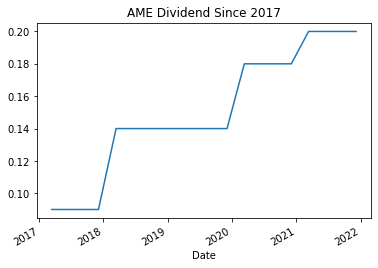

In [13]:
# show actions (dividends, splits)
ticker.actions.Dividends.plot(title='AME Dividend Since 2017')

In [14]:
ticker.dividends

Date
2017-03-15    0.09
2017-06-14    0.09
2017-09-14    0.09
2017-12-05    0.09
2018-03-15    0.14
2018-06-14    0.14
2018-09-13    0.14
2018-12-06    0.14
2019-03-14    0.14
2019-06-13    0.14
2019-09-13    0.14
2019-12-05    0.14
2020-03-12    0.18
2020-06-11    0.18
2020-09-11    0.18
2020-12-04    0.18
2021-03-12    0.20
2021-06-11    0.20
2021-09-13    0.20
2021-12-07    0.20
Name: Dividends, dtype: float64

### Annual and Quarterly Financial Statement Summary

In [19]:
ame_financials = ticker.financials.T

ame_financials

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,...,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares
,,,,,,,,,,,,,,,,,,,,,
2020-12-31,None,None,1082309000.0,None,872439000.0,538109000.0,1587214000.0,1049105000.0,1049105000.0,None,...,None,None,209870000.0,4540029000.0,3490924000.0,2952815000.0,33204000.0,None,872439000.0,872439000.0
2019-12-31,None,None,1069748000.0,None,861297000.0,643680000.0,1787660000.0,1143980000.0,1143980000.0,None,...,None,None,208451000.0,5158557000.0,4014577000.0,3370897000.0,-74232000.0,None,861297000.0,861297000.0
2018-12-31,None,None,987745000.0,None,777933000.0,597433000.0,1659562000.0,1062129000.0,1062129000.0,None,...,None,None,209812000.0,4845872000.0,3783743000.0,3186310000.0,-74384000.0,None,777933000.0,777933000.0
2017-12-31,None,None,796729000.0,None,681470000.0,553853000.0,1438800000.0,884947000.0,884947000.0,None,...,None,None,115259000.0,4300170000.0,3415223000.0,2861370000.0,-88218000.0,None,681470000.0,681470000.0


In [30]:
ame_financialsquarterly = ticker.quarterly_financials.T

ame_financialsquarterly

,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,...,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares
,,,,,,,,,,,,,,,,,,,,,
2021-09-30,None,None,319668000.0,None,257460000.0,161523000.0,491279000.0,329756000.0,329756000.0,None,...,None,None,62208000.0,1440681000.0,1110925000.0,949402000.0,-10088000.0,None,257460000.0,257460000.0
2021-06-30,None,None,291755000.0,None,231679000.0,161846000.0,473634000.0,311788000.0,311788000.0,None,...,None,None,60076000.0,1386346000.0,1074558000.0,912712000.0,-20033000.0,None,231679000.0,231679000.0
2021-03-31,None,None,272456000.0,None,219233000.0,138440000.0,426350000.0,287910000.0,287910000.0,None,...,None,None,53223000.0,1215742000.0,927832000.0,789392000.0,-15454000.0,None,219233000.0,219233000.0
2020-12-31,None,None,276707000.0,None,221025000.0,135844000.0,428979000.0,293135000.0,293135000.0,None,...,None,None,55682000.0,1198947000.0,905812000.0,769968000.0,-16428000.0,None,221025000.0,221025000.0


### Annual and Quarterly Balance Sheet

In [37]:
ame_balance_sheet = ticker.balance_sheet.T

(ame_balance_sheet / 1000000000).round(3)

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,...,Short Long Term Debt,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable
,,,,,,,,,,,,,,,,,,,,,
2020-12-31,2.624,0.922,4.408,5.949,0.414,10.357,0.003,0.084,7.095,0.923,...,0.132,-0.504,0.694,2.522,0.009,-0.899,0.666,2.281,0.559,0.360
2019-12-31,2.763,0.833,4.729,5.115,0.370,9.845,0.003,0.190,6.388,0.889,...,0.497,-0.533,0.729,2.026,0.008,-1.695,0.818,2.271,0.625,0.377
2018-12-31,2.404,0.707,4.420,4.242,0.350,8.662,0.003,0.066,5.654,0.888,...,0.359,-0.551,0.554,1.836,0.008,-1.774,0.791,2.274,0.625,0.400
2017-12-31,2.013,0.661,3.768,4.028,0.113,7.796,0.003,0.066,5.002,0.764,...,0.308,-0.429,0.493,1.935,0.008,-1.101,0.682,1.866,0.541,0.437


In [41]:
AME_quarterly_balance_sheet =  ticker.quarterly_balance_sheet.T  / 1000000000

AME_quarterly_balance_sheet

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,...,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges
,,,,,,,,,,,,,,,,,,,,,
2021-09-30,3.344855,0.986317,5.121299,6.558396,0.382754,11.679695,0.002686,0.113079,7.664682,1.121858,...,-0.524265,0.766563,2.061815,0.010456,-1.967458,0.851372,2.238920,0.738688,0.446409,NaN
2021-06-30,3.473694,0.964791,5.411965,6.343299,0.347805,11.755264,0.002684,0.111919,7.453401,1.156306,...,-0.506881,0.777525,2.042081,0.010085,-2.270202,0.827898,2.262100,0.711620,0.446532,NaN
2021-03-31,2.700848,0.928412,4.459135,6.120748,0.325444,10.579883,0.002678,0.095630,7.267856,0.936502,...,-0.512875,0.715988,2.573493,0.012281,-0.872502,0.749882,2.256910,0.604321,0.397075,NaN
2020-12-31,2.623719,0.921752,4.408137,5.949346,0.413966,10.357483,0.002676,0.084034,7.094656,0.922608,...,-0.504468,0.693763,2.522470,0.008969,-0.899279,0.666443,2.281441,0.559171,0.360370,0.012103


### Annual and Quarterly Cashflow Statement

In [47]:
ticker.earnings

,Revenue,Earnings
Year,,
2017,4300170000,681470000
2018,4845872000,777933000
2019,5158557000,861297000
2020,4540029000,872439000


In [48]:
ticker.quarterly_earnings

,Revenue,Earnings
Quarter,,
4Q2020,1198947000,221025000
1Q2021,1215742000,219233000
2Q2021,1386346000,231679000
3Q2021,1440681000,257460000


### Sustainability: Environmental, Social and Governance (ESG)

In [49]:
ticker.sustainability

,Value
2021-9,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.95
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


### Analyst Recommendations

In [60]:
ticker.recommendations.tail(25)

,Firm,To Grade,From Grade,Action
Date,,,,
2020-08-07 13:28:37,Morgan Stanley,Overweight,,main
2020-10-13 12:16:30,Morgan Stanley,Overweight,,main
2020-10-14 08:44:12,KeyBanc,Overweight,,main
2020-10-30 11:24:40,Rosenblatt,Buy,,main
2020-10-30 12:32:23,Morgan Stanley,Overweight,,main
2020-11-13 09:12:30,KeyBanc,Overweight,,main
2020-11-23 12:56:29,Morgan Stanley,Overweight,,main
2020-11-24 13:13:34,Morgan Stanley,Overweight,,main
2021-02-05 13:11:13,Morgan Stanley,Overweight,,main


In [61]:
ticker.recommendations.tail(25)
ticker.recommendations.tail(10)

,Firm,To Grade,From Grade,Action
Date,,,,
2021-05-05 10:12:47,Keybanc,Overweight,,main
2021-05-05 11:49:26,Morgan Stanley,Overweight,,main
2021-08-04 08:31:00,Keybanc,Overweight,,main
2021-08-04 11:29:34,Rosenblatt,Buy,,main
2021-08-04 12:32:06,Morgan Stanley,Overweight,,main
2021-10-07 12:55:18,Morgan Stanley,Overweight,,main
2021-11-03 12:29:54,RBC Capital,Outperform,,main
2021-11-03 13:54:31,Morgan Stanley,Overweight,,main
2021-12-14 10:06:49,Wolfe Research,Outperform,Peer Perform,up


### Upcoming Events

In [62]:
ticker.calendar

,0,1
Earnings Date,2022-02-02 13:30:00,2022-02-07 13:30:00
Earnings Average,1.3,1.3
Earnings Low,1.27,1.27
Earnings High,1.35,1.35
Revenue Average,1465540000,1465540000
Revenue Low,1445600000,1445600000
Revenue High,1511000000,1511000000


### Option Expiration Dates

In [63]:
ticker.options

('2022-01-21', '2022-02-18', '2022-03-18', '2022-06-17')

In [64]:
expiration = ticker.options[0]

In [65]:
options = ticker.option_chain(expiration)

In [66]:
options.calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     9 non-null      object        
 1   lastTradeDate      9 non-null      datetime64[ns]
 2   strike             9 non-null      float64       
 3   lastPrice          9 non-null      float64       
 4   bid                9 non-null      float64       
 5   ask                9 non-null      float64       
 6   change             9 non-null      float64       
 7   percentChange      9 non-null      float64       
 8   volume             4 non-null      float64       
 9   openInterest       9 non-null      int64         
 10  impliedVolatility  9 non-null      float64       
 11  inTheMoney         9 non-null      bool          
 12  contractSize       9 non-null      object        
 13  currency           9 non-null      object        
dtypes: bool(1), da

In [67]:
options.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AME220121C00110000,2021-12-13 16:00:12,110.0,33.0,27.40,30.90,0.0,0.000000,NaN,1,0.732180,True,REGULAR,USD
1,AME220121C00125000,2021-12-15 18:44:19,125.0,18.0,14.70,15.20,0.0,0.000000,NaN,0,0.363043,True,REGULAR,USD
2,AME220121C00135000,2021-11-29 18:39:48,135.0,8.1,6.40,6.90,0.0,0.000000,NaN,1,0.286384,True,REGULAR,USD
3,AME220121C00140000,2021-12-20 17:13:35,140.0,3.2,3.50,4.00,-0.6,-15.789472,7.0,36,0.272346,False,REGULAR,USD
4,AME220121C00145000,2021-12-17 20:52:04,145.0,1.7,1.25,1.85,0.0,0.000000,33.0,53,0.249641,False,REGULAR,USD


In [68]:
options.puts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     6 non-null      object        
 1   lastTradeDate      6 non-null      datetime64[ns]
 2   strike             6 non-null      float64       
 3   lastPrice          6 non-null      float64       
 4   bid                6 non-null      float64       
 5   ask                6 non-null      float64       
 6   change             6 non-null      float64       
 7   percentChange      6 non-null      float64       
 8   volume             5 non-null      float64       
 9   openInterest       6 non-null      int64         
 10  impliedVolatility  6 non-null      float64       
 11  inTheMoney         6 non-null      bool          
 12  contractSize       6 non-null      object        
 13  currency           6 non-null      object        
dtypes: bool(1), da

## Data Download with proxy server

You can use a proxy server to avoid having your IP blacklisted as illustrated below (but need an actual PROXY_SERVER).

In [27]:
PROXY_SERVER = 'PROXY_SERVER'

The following will only work with proper PROXY_SERVER...

In [28]:
# msft = yf.Ticker("MSFT")

# msft.history(proxy=PROXY_SERVER)
# msft.get_actions(proxy=PROXY_SERVER)
# msft.get_dividends(proxy=PROXY_SERVER)
# msft.get_splits(proxy=PROXY_SERVER)
# msft.get_balance_sheet(proxy=PROXY_SERVER)
# msft.get_cashflow(proxy=PROXY_SERVER)
# msgt.option_chain(proxy=PROXY_SERVER)

## Downloading multiple symbols

In [5]:

AME_shares = 25

FINV_shares = 150

CNK_shares = 150 

HPE_shares = 50

In [6]:
tickers = yf.Tickers('ame finv cnk hpe')

In [7]:
tickers

yfinance.Tickers object <AME,FINV,CNK,HPE>

In [9]:
pd.Series(tickers.tickers['FINV'].info)

zip                                                               201203
sector                                                Financial Services
fullTimeEmployees                                                   3064
longBusinessSummary    FinVolution Group, an investment holding compa...
city                                                            Shanghai
                                             ...                        
dividendYield                                                     0.0362
bidSize                                                             1100
dayHigh                                                             4.94
regularMarketPrice                                                  4.88
logo_url                      https://logo.clearbit.com/ir.finvgroup.com
Length: 151, dtype: object

In [14]:
tickers.tickers['CNK'].history(period="5y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-12-23,34.390039,34.452340,34.087435,34.212036,440500,0.0,0
2016-12-27,34.212027,34.452331,34.114129,34.256531,464000,0.0,0
2016-12-28,34.229837,34.336641,34.042935,34.212036,416500,0.0,0
2016-12-29,34.274329,34.425633,33.838226,34.238731,395100,0.0,0
2016-12-30,34.238733,34.274331,33.820426,34.140831,512400,0.0,0
...,...,...,...,...,...,...,...
2021-12-16,16.719999,16.870001,15.970000,16.160000,1955600,0.0,0
2021-12-17,15.930000,16.809999,15.760000,16.209999,5698500,0.0,0
2021-12-20,16.090000,16.950001,15.970000,16.610001,2775500,0.0,0


In [15]:
tickers.history(period='3mo').stack(-1)

[*********************100%***********************]  4 of 4 completed


Close  Dividends        High         Low        Open  \
Date                                                                         
2021-09-23 AME   129.055389        0.0  129.864230  128.056818  128.416304   
           CNK    18.820000        0.0   18.850000   18.129999   18.190001   
           FINV    5.940000        0.0    6.000000    5.850000    5.920000   
           HPE    13.336482        0.0   13.495250   13.118177   13.147946   
2021-09-24 AME   129.424850        0.0  129.964072  128.356372  128.516147   
...                     ...        ...         ...         ...         ...   
2021-12-21 HPE    15.420000        0.0   15.425000   14.985000   14.985000   
2021-12-22 AME   141.050003        0.0  141.690002  140.179993  140.559998   
           CNK    17.330000        0.0   17.440001   16.830000   17.230000   
           FINV    4.880000        0.0    4.940000    4.720000    4.840000   
           HPE    15.550000        0.0   15.560000   15.285000   15.420000   

                 Stock Splits   Volume  
Date                                    
2021-09-23 AME              0   862400  
           CNK              0  2855300  
           FINV             0   788500  
           HPE              0  6825700  
2021-09-24 AME              0  1124500  
...                       ...      ...  
2021-12-21 HPE              0  9422200  
2021-12-22 AME              0   531016  
           CNK              0  2327169  
           FINV             0   582366  
           HPE              0  6692516  

[256 rows x 7 columns]

In [16]:
data = yf.download("CNK HPE", start="2020-01-01", end="2020-01-05")

[*********************100%***********************]  2 of 2 completed


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2020-01-02 to 2020-01-03
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, CNK)  2 non-null      float64
 1   (Adj Close, HPE)  2 non-null      float64
 2   (Close, CNK)      2 non-null      float64
 3   (Close, HPE)      2 non-null      float64
 4   (High, CNK)       2 non-null      float64
 5   (High, HPE)       2 non-null      float64
 6   (Low, CNK)        2 non-null      float64
 7   (Low, HPE)        2 non-null      float64
 8   (Open, CNK)       2 non-null      float64
 9   (Open, HPE)       2 non-null      float64
 10  (Volume, CNK)     2 non-null      int64  
 11  (Volume, HPE)     2 non-null      int64  
dtypes: float64(10), int64(2)
memory usage: 208.0 bytes


In [36]:
data = yf.download(
        tickers = "SPY AAPL MSFT", # list or string

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  3 of 3 completed


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4680 entries, 2021-10-08 04:00:00-04:00 to 2021-10-14 19:11:00-04:00
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (MSFT, Open)    3974 non-null   float64
 1   (MSFT, High)    3974 non-null   float64
 2   (MSFT, Low)     3974 non-null   float64
 3   (MSFT, Close)   3974 non-null   float64
 4   (MSFT, Volume)  3974 non-null   float64
 5   (SPY, Open)     4490 non-null   float64
 6   (SPY, High)     4490 non-null   float64
 7   (SPY, Low)      4490 non-null   float64
 8   (SPY, Close)    4490 non-null   float64
 9   (SPY, Volume)   4490 non-null   float64
 10  (AAPL, Open)    4396 non-null   float64
 11  (AAPL, High)    4396 non-null   float64
 12  (AAPL, Low)     4396 non-null   float64
 13  (AAPL, Close)   4396 non-null   float64
 14  (AAPL, Volume)  4396 non-null   float64
dtypes: float64(15)
memory usage: 585.0 KB


In [38]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

# download dataframe
data = pdr.get_data_yahoo('SPY',
                          start='2017-01-01',
                          end='2019-04-30',
                          auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [39]:
# auto_adjust = True
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-23,290.679993,293.140015,290.420013,292.880005,280.665039,52246600
2019-04-24,292.790009,293.160004,292.070007,292.230011,280.042206,50392900
2019-04-25,292.119995,292.779999,290.730011,292.049988,279.869690,57770900
2019-04-26,292.100006,293.489990,291.239990,293.410004,281.172974,50916400
2019-04-29,293.510010,294.450012,293.410004,293.869995,281.613739,57197700


In [40]:
# auto_adjust = False
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-23,290.679993,293.140015,290.420013,292.880005,280.665039,52246600
2019-04-24,292.790009,293.160004,292.070007,292.230011,280.042206,50392900
2019-04-25,292.119995,292.779999,290.730011,292.049988,279.869690,57770900
2019-04-26,292.100006,293.489990,291.239990,293.410004,281.172974,50916400
2019-04-29,293.510010,294.450012,293.410004,293.869995,281.613739,57197700


In [38]:
import pandas as pd
import numpy as np
from pylab import plt, mpl
plt.style.use('seaborn')
import os
import json
import requests
from dotenv import load_dotenv
%matplotlib inline
from pathlib import Path
import hvplot.pandas
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score


In [39]:
# Import the required libraries and dependencies

import os

import requests

import json

import pandas as pd

from dotenv import load_dotenv

import alpaca_trade_api as tradeapi

#from MCForecastTools import MCSimulation

import datetime

%matplotlib inline

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [40]:
# Load the environment variables from the .env file
#by calling the load_dotenv function

load_dotenv()


Python-dotenv could not parse statement starting at line 29
Python-dotenv could not parse statement starting at line 30


True

In [41]:
"""
Create an interview for the costumer. 

* Monthly Income; Type of income.
* Monthly Over Head; Debt: Types of debt.Liabilities
* Finanical Statement/Documentation 
* Assets: Real Estate, Business, Stocks, Bonds, Cyptocurrencies.
* Financial Goals: This has to be simple and still extremly descritive

"""

'\nCreate an interview for the costumer. \n\n* Monthly Income; Type of income.\n* Monthly Over Head; Debt: Types of debt.Liabilities\n* Finanical Statement/Documentation \n* Assets: Real Estate, Business, Stocks, Bonds, Cyptocurrencies.\n* Financial Goals: This has to be simple and still extremly descritive\n\n'

In [42]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

link_url = "https://api.alternative.me/v2/ticker/Chainlink/?convert=USD"

#sushi_url = "https://api.alternative.me/v2/ticker/Sushiswap/?convert=USD"

atom_url = "https://api.alternative.me/v2/ticker/Cosmos/?convert=USD"

algo_url = "https://api.alternative.me/v2/ticker/Algorand/?convert=USD"

In [43]:
# Using the Python requests library, make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

print(json.dumps(btc_response, indent=8, sort_keys=True))


# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response['data']['1']["quotes"]["USD"]['price']

btc2_price = btc_response['data']['1']["quotes"]['USD']
seriesbtc = pd.Series(btc2_price)

display(seriesbtc)

{
        "data": {
                "1": {
                        "circulating_supply": 18912531,
                        "id": 1,
                        "last_updated": 1640625574,
                        "max_supply": 21000000,
                        "name": "Bitcoin",
                        "quotes": {
                                "USD": {
                                        "market_cap": 975163161905,
                                        "percent_change_1h": 0.688898173418043,
                                        "percent_change_24h": 2.56072903053008,
                                        "percent_change_7d": 10.3993357873742,
                                        "percentage_change_1h": 0.688898173418043,
                                        "percentage_change_24h": 2.56072903053008,
                                        "percentage_change_7d": 10.3993357873742,
                                        "price": 51675.0,
                                   

price                    5.167500e+04
volume_24h               2.148733e+10
market_cap               9.751632e+11
percentage_change_1h     6.888982e-01
percentage_change_24h    2.560729e+00
percentage_change_7d     1.039934e+01
percent_change_1h        6.888982e-01
percent_change_24h       2.560729e+00
percent_change_7d        1.039934e+01
dtype: float64

In [44]:
# YOUR CODE HERE

# Print the current price of BTC
# YOUR CODE HERE
print(f"The price for Bitcoin is ${btc_price}");

The price for Bitcoin is $51675.0


In [45]:
# Using the Python requests library, make an API call to access the current price ETH

eth_response = requests.get(eth_url).json()

# YOUR CODE HERE

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=8, sort_keys=True))

# Navigate the ETH response object to access the current price of ETH

eth_price = eth_response['data']['1027']["quotes"]["USD"]["price"]

# Print the current price of ETH
# YOUR CODE HERE
print(f"The price for ETH is ${eth_price}");


algo_responce = requests.get(algo_url).json()


print(json.dumps(algo_responce, indent=8, sort_keys=True))

algo_price = algo_responce['data']['0']["quotes"]["USD"]["price"]

print(f"The price for ALGO is ${algo_price}");


atom_res = requests.get(atom_url).json()


print(json.dumps(atom_res, indent=8, sort_keys=True))


Cosmos_price = atom_res['data']['1420']["quotes"]["USD"]["price"]

print(f"The price for Cosmos is ${Cosmos_price}");


link_responce = requests.get(link_url).json()


print(json.dumps(link_responce, indent=8, sort_keys=True))

link_price = link_responce['data']['1975']["quotes"]["USD"]["price"]

print(f"The price for Chainlink is ${link_price}")

{
        "data": {
                "1027": {
                        "circulating_supply": 118914314,
                        "id": 1027,
                        "last_updated": 1640625412,
                        "max_supply": 0,
                        "name": "Ethereum",
                        "quotes": {
                                "USD": {
                                        "market_cap": 487350954059,
                                        "percent_change_1h": 0.337747879302947,
                                        "percent_change_24h": 0.580111974629198,
                                        "percent_change_7d": 4.42415029360022,
                                        "percentage_change_1h": 0.337747879302947,
                                        "percentage_change_24h": 0.580111974629198,
                                        "percentage_change_7d": 4.42415029360022,
                                        "price": 4102.66,
                                

In [46]:
# Compute the current value of the BTC holding

# Establishing cryptocurrency holdings
  
# print data type
# The current number of coins for each cryptocurrency asset held in the portfolio.

btc = 0.0457424

eth = 1.07048

link = 100

atom = 100

algo =  1101

sushi = 95

btc_value = btc_price * btc

eth_value = eth_price * eth

link_val = link_price * link

atom_val = Cosmos_price * atom

algo_val = algo_price * algo

total_crypto_wallet = btc_value + eth_value + link_val + atom_val + algo_val

# Print current value of your holding in crypto - missing shushiswap

print(f"The total value for your Bitcoin is ${btc_value:.2f}")

print(f"The total value for your Ethereum is ${eth_value:.2f}")

print(f"The total value for your Chainlink is ${link_val:.2f}")

print(f"The total value for your Cosmos is ${atom_val:.2f}")

print(f"The total value for your Algo is ${algo_val:.2f}")

print(f"The total value for your cryptocurrency wallet is ${total_crypto_wallet:.2f}")



The total value for your Bitcoin is $2363.74
The total value for your Ethereum is $4391.82
The total value for your Chainlink is $2419.00
The total value for your Cosmos is $3169.00
The total value for your Algo is $1871.70
The total value for your cryptocurrency wallet is $14215.25


In [47]:
# Creating datime objects for todays date and one year from that date

today_date = str(datetime.datetime.now()).split()[0]

three_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=3*365)).split()[0]

In [48]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE

def getPorfolioDatesInfo(tickers):
    
    # Set timeframe to 1D 

    timeframe = '1D'
    SMA1 = 25
    SMA2 = 100

    # Format current date as ISO format
    # Set both the start and end date at the date of your prior weekday 
    # This will give you the closing price of the previous trading day
    # Alternatively you can use a start and end date of 2020-08-07
    # YOUR CODE HERE

    start_date = pd.Timestamp(today_date , tz="America/New_York").isoformat()
    end_date = pd.Timestamp(one_year_ago, tz="America/New_York").isoformat()

    return tickers, timeframe, SMA1, SMA2, start_date, end_date

    

In [51]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE

tickers = ["WATT", "FINV", "BTCM"]
# Set timeframe to 1D 
# YOUR CODE HERE
timeframe = '1D'
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE

start_date = pd.Timestamp(today_date , tz="America/New_York").isoformat()
end_date = pd.Timestamp(three_year_ago, tz="America/New_York").isoformat()

display(start_date)
display(end_date)
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE

alpaca_api_key = os.getenv("ALPACA_API_KEY")

alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Printing API key type to confirm key upload

print(f"Alpaca Key type: {type(alpaca_api_key)}")

print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

'2021-12-27T00:00:00-05:00'

'2018-12-28T00:00:00-05:00'

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [52]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [56]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["AME",  "BABA", "FINV", "STLA", "HPE"]
# Set timeframe to 1D 
# YOUR CODE HERE
timeframe = '1D'
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE

display(start_date)
display(end_date)


'2018-12-28T00:00:00-05:00'

'2021-12-27T00:00:00-05:00'

In [59]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE

portfolio_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = pd.Timestamp(three_year_ago , tz="America/New_York").isoformat(),
    end = pd.Timestamp(today_date, tz="America/New_York").isoformat()
    ).df

# Review the resulting `portfolio_prices_df` DataFrame. 

portfolio_prices_df.tail()


AME                                      BABA                                        FINV                                  HPE                                     STLA                                 
                             open    high     low     close  volume    open    high       low     close    volume  open    high   low close   volume    open    high     low    close   volume   open    high     low   close   volume
time                                                                                                                                                                                                                                  
2021-12-20 00:00:00-05:00  138.56  139.79  136.94  139.1000  611779  118.51  118.83  113.6950  115.0000  20965419  4.95  5.0200  4.69  4.69   995041  14.900  14.960  14.595  14.8500  9607494  17.94  18.040  17.775  18.000  2575566
2021-12-21 00:00:00-05:00  140.12  141.19  139.02  140.6800  466846  116.85  122.98  116.6000  122.9700  16559362  4.69  4.9350  4.69  4.90   733468  14.985  15.425  14.985  15.4200  7681153  18.27  18.470  18.225  18.460  1540769
2021-12-22 00:00:00-05:00  140.56  141.69  140.18  141.0600  408453  117.05  118.66  115.1500  117.8000  22490579  4.84  4.9400  4.72  4.88   455372  15.420  15.560  15.280  15.5400  5880386  18.31  18.700  18.300  18.700  1779755
2021-12-23 00:00:00-05:00  141.43  143.28  141.43  142.5500  313516  116.96  119.59  115.3900  118.7100  16683442  4.88  4.9472  4.82  4.91  1111407  15.630  15.875  15.570  15.7600  5821028  18.65  18.840  18.640  18.775  1516786
2021-12-27 00:00:00-05:00  143.33  144.59  142.98  144.4292  100267  117.63  121.80  116.1021  116.6849  10762790  4.95  4.9500  4.60  4.90   421619  15.750  15.970  15.700  15.9201  1793996  18.94  19.145  18.910  19.120   948484

In [60]:
portfolio_prices_df

AME                                            BABA                                           FINV                                    HPE                                        STLA                                    
                             open     high       low     close   volume      open      high       low     close    volume   open    high     low close   volume    open     high      low    close    volume   open     high      low    close   volume
time                                                                                                                                                                                                                                                   
2021-08-05 00:00:00-04:00  137.47  137.810  136.0950  136.8700   616337  199.3500  200.2900  197.6400  199.2900   9467311  6.390  6.5000  6.2600  6.36  1054804  14.750  14.8400  14.6350  14.6900   4428891  20.53  20.6650  20.5050  20.5600  2125889
2021-08-06 00:00:00-04:00  137.89  138.040  136.1400  136.7900   780427  199.4600  199.3200  195.6800  196.4100  11587218  6.430  6.4800  6.1450  6.26  1277431  14.790  14.9800  14.7700  14.8800   3128434  21.18  21.1800  21.0043  21.0900  2965188
2021-08-09 00:00:00-04:00  136.92  136.920  135.8000  136.0500   417011  194.5700  195.5000  192.8200  195.2400  14059914  6.580  6.7300  6.3600  6.61   852695  14.860  14.8601  14.6500  14.7200   3874423  21.02  21.1950  21.0050  21.1200  1717574
2021-08-10 00:00:00-04:00  136.10  137.160  136.0000  136.8000   785000  197.2700  198.4500  195.0727  195.7300   9546843  6.690  6.8000  6.3800  6.38  1174158  14.700  14.8300  14.6300  14.8300   6116523  21.01  21.1250  20.9900  21.0800  1712394
2021-08-11 00:00:00-04:00  137.31  137.600  136.6250  137.4500   810036  196.3900  196.9200  194.7300  194.8700   8656583  6.525  6.5250  6.2400  6.38   935984  14.890  15.2800  14.7400  15.1800   5566119  21.20  21.3400  21.0800  21.3250  1970975
2021-08-12 00:00:00-04:00  137.56  137.805  136.8900  137.2400   405429  191.8800  192.9800  189.6850  191.6500  12373794  6.350  6.3500  6.0760  6.21   726822  15.210  15.2500  15.0350  15.2100   3473256  21.67  21.7450  21.5350  21.6950  1985090
2021-08-13 00:00:00-04:00  137.20  137.310  136.2400  137.2500   312318  188.8100  189.2600  186.7100  188.6200  14308107  6.200  6.2350  6.0000  6.07   880202  15.200  15.2000  14.9600  14.9800   4150541  21.95  21.9900  21.7800  21.8250  2371011
2021-08-16 00:00:00-04:00  137.15  137.670  136.1000  137.6100   523872  185.0000  186.2600  181.5100  182.7000  20353897  6.000  6.0000  5.6900  5.87  1935953  14.900  15.0300  14.6600  15.0000   5601408  21.60  21.6900  21.4950  21.6850  1532735
2021-08-17 00:00:00-04:00  136.90  137.280  135.1900  136.2600   458979  175.9800  177.8900  173.1500  173.7300  35964015  5.400  5.8200  5.3200  5.82  1087407  14.920  14.9500  14.6500  14.9350   6833883  21.09  21.1600  20.6350  20.8500  2528699
2021-08-18 00:00:00-04:00  135.64  136.470  134.9200  134.9400   500120  174.4300  175.3600  172.1100  172.3400  30145904  5.820  5.9200  5.6200  5.77  1307835  14.850  14.9600  14.7000  14.7100   5568137  20.93  21.0900  20.8700  20.8750  1350870
2021-08-19 00:00:00-04:00  133.86  135.450  133.5960  134.4000   522505  166.4100  167.2644  159.5100  160.5400  60188108  5.630  5.7700  5.4650  5.76  1695017  14.580  14.6300  14.2700  14.3850   6143200  20.42  20.4700  20.1600  20.3400  3236933
2021-08-20 00:00:00-04:00  134.45  135.780  133.8700  134.7300   417200  164.1400  166.9300  155.5000  157.9961  68496473  5.840  6.2300  5.7500  5.78  2991077  14.400  14.5900  14.3500  14.5700   3011712  20.04  20.1800  19.9750  20.1600  2317001
2021-08-23 00:00:00-04:00  135.61  136.050  134.9350  135.3100   391799  159.1600  161.2700  152.8000  161.1500  81069927  6.370  6.4900  5.8500  6.08  2139370  14.570  14.8000  14.5500  14.7000   3928061  20.11  20.3150  20.0853  20.2800   986022
2021-08-24 00:00:00-04:00  135.53  136.600  135.4900  136.0700